# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Level : Hard

Website Data Pekerjaan di Indonesia pada halaman https://www.kalibrr.id/id-ID/job-board/te/data/1

Mengambil data `title pekerjaan`, `lokasi pekerjaan`, `tanggal pekerjaan di post dan dealine submit permohonan`, dan `perusahaan` dari 15 halaman pertama.

Webscraping ini dilakukan untuk mendapatkan informasi terkait pekerjaan-pekerjaan yang ada dan informasi detail lainnya. Kemudian data yang didapat akan dilakukan *process* *EDA* dan *Data Wrangling*. Hasil akhir dari data ini akan dijadikan visualisasi dan akan diimplementasikan dengan menggunakan *library* `Flask`.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [82]:
import requests

url_get = requests.get('https://www.kalibrr.id/id-ID/job-board/te/data/1')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [83]:
url_get.content[1:500]

b'!DOCTYPE html><html lang="id-ID"><head><meta name="viewport" content="width=device-width"/><meta charSet="utf-8"/><script type="application/ld+json">{\n    "@context": "https://schema.org",\n    "@type": "WebSite",\n    "url": "https://www.kalibrr.com",\n    "potentialAction": [\n      {\n        "@type": "SearchAction",\n        "target": "https://www.kalibrr.com/job-board/te/={search_term_string}",\n        "query-input": "required name=search_term_string"\n      }\n     ]\n  }</script><meta property="o'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [84]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [85]:
print(soup.prettify()[1:500])

!DOCTYPE html>
<html lang="id-ID">
 <head>
  <meta content="width=device-width" name="viewport"/>
  <meta charset="utf-8"/>
  <script type="application/ld+json">
   {
    "@context": "https://schema.org",
    "@type": "WebSite",
    "url": "https://www.kalibrr.com",
    "potentialAction": [
      {
        "@type": "SearchAction",
        "target": "https://www.kalibrr.com/job-board/te/={search_term_string}",
        "query-input": "required name=search_term_string"
      }
     ]
  }
  </scrip


Selanjutnya, melakukan *scraping* untuk `15` halaman pertama.

In [86]:
halaman = 15

title = []
lokasi = []
post_dl = []
perusahaan = []

for i in range(1, halaman + 1):
    print(f'Proses Halaman {i}')
    url_get = requests.get(f"https://www.kalibrr.id/id-ID/job-board/te/data/{i}")
    soup = BeautifulSoup(url_get.content,"html.parser")
    title_0 = soup.find_all('h2', attrs = {'class' : 'k-text-xl k-font-medium'})
    title_1 = BeautifulSoup(str(title_0), 'html.parser')
    for item in title_1.find_all('a', attrs={'class':'k-text-primary-color'}):
        title.append(item.text)
    perusahaan_0 = soup.find_all('span', attrs = {'class' : 'k-inline-flex k-items-center k-mb-1'})
    perusahaan_1 = BeautifulSoup(str(perusahaan_0), 'html.parser')
    for item in perusahaan_1.find_all('a', attrs={'class':'k-text-subdued'}):
        perusahaan.append(item.text)
    for item in soup.find_all('a', attrs={'class':'k-text-subdued k-block'}):
        lokasi.append(item.text)
    for item in soup.find_all('span', attrs={'class':'k-block k-mb-1'}):
        post_dl.append(item.text)
print('DONE')

Proses Halaman 1
Proses Halaman 2
Proses Halaman 3
Proses Halaman 4
Proses Halaman 5
Proses Halaman 6
Proses Halaman 7
Proses Halaman 8
Proses Halaman 9
Proses Halaman 10
Proses Halaman 11
Proses Halaman 12
Proses Halaman 13
Proses Halaman 14
Proses Halaman 15
DONE


Memastikan apakah data yang didapat sudah sesuai, yaitu 15 data pekerjaan setiap halaman dan halaman yang diambil berjumlah 15. Maka data seharusnya berjumlah `15 x 15 = 225` data setiap kolom nya.

In [87]:
len(title), len(lokasi), len(post_dl), len(perusahaan)

(225, 225, 225, 225)

Terlihat bahwa jumlah data sudah sesuai dengan yang seharusnya.

## Creating data frame & Data wrangling

Put the array into dataframe

Data diambil pada tanggal **12 April 2023 pukul 18.40 WIB**
Insight yang diberikan pada notebook ini akan berdasarkan data yang diambil pada waktu tersebut. Jika melakukan *webscraping* kembali di waktu yang berbeda, kemungkinan data akan berbeda dengan yang ada disini.

In [88]:
import pandas as pd

df = pd.DataFrame({"Title Pekerjaan":title,"Lokasi": lokasi, "Post dan Deadline":post_dl, "Perusahaan": perusahaan})
df.head()

,Title Pekerjaan,Lokasi,Post dan Deadline,Perusahaan
0,DevOps and Data Engineer,"Tangerang Selatan, Indonesia",Posted 8 days ago • Apply before 13 May,Mobius Digital
1,Data Quality Analyst,"Central Jakarta City, Indonesia",Posted 9 days ago • Apply before 1 May,Astra Financial
2,Project Manager,"Jakarta, Indonesia",Posted 9 days ago • Apply before 29 Jun,PGI Data
3,Network Security Engineer,"Jakarta, Indonesia",Posted 7 days ago • Apply before 19 Apr,PGI Data
4,iOS Developer,"Jakarta Selatan, Indonesia",Posted 2 days ago • Apply before 9 May,PhinCon


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [89]:
df.isna().sum()

Title Pekerjaan      0
Lokasi               0
Post dan Deadline    0
Perusahaan           0
dtype: int64

In [90]:
df.dtypes

Title Pekerjaan      object
Lokasi               object
Post dan Deadline    object
Perusahaan           object
dtype: object

In [91]:
df.nunique()

Title Pekerjaan      145
Lokasi                35
Post dan Deadline    113
Perusahaan            87
dtype: int64

In [92]:
df['Lokasi'].value_counts()

South Jakarta, Indonesia           36
Jakarta, Indonesia                 19
Tangerang, Indonesia               19
Jakarta Selatan, Indonesia         18
Jakarta Pusat, Indonesia           17
Central Jakarta, Indonesia         14
North Jakarta, Indonesia           11
West Jakarta, Indonesia            10
South Tangerang, Indonesia          9
Kota Jakarta Selatan, Indonesia     9
Jakarta Barat, Indonesia            8
Surabaya, Indonesia                 7
Central Jakarta City, Indonesia     5
Sleman, Indonesia                   4
Bandung Kota, Indonesia             3
Kota Jakarta Pusat, Indonesia       3
Tangerang Selatan, Indonesia        3
Malang Kota, Indonesia              3
Yogyakarta, Indonesia               2
Jakarta Utara, Indonesia            2
South Jakarta City, Indonesia       2
Makassar, Indonesia                 2
Banyuwangi, Indonesia               2
Bandung Kabupaten, Indonesia        2
Tangerang Kabupaten, Indonesia      2
Banjarmasin, Indonesia              2
East Jakarta

Karena semua kota berasal dari negara Indonesia, maka disini akan menghapus kata Indonesia untuk mempermudah membaca data

In [93]:
df['Lokasi'] = df['Lokasi'].replace(', Indonesia', '', regex = True)

In [94]:
df['Lokasi'].value_counts()

South Jakarta           36
Jakarta                 19
Tangerang               19
Jakarta Selatan         18
Jakarta Pusat           17
Central Jakarta         14
North Jakarta           11
West Jakarta            10
South Tangerang          9
Kota Jakarta Selatan     9
Jakarta Barat            8
Surabaya                 7
Central Jakarta City     5
Sleman                   4
Bandung Kota             3
Kota Jakarta Pusat       3
Tangerang Selatan        3
Malang Kota              3
Yogyakarta               2
Jakarta Utara            2
South Jakarta City       2
Makassar                 2
Banyuwangi               2
Bandung Kabupaten        2
Tangerang Kabupaten      2
Banjarmasin              2
East Jakarta             2
Tangerang Kota           2
Kota Jakarta Barat       1
Depok City               1
Jember                   1
Tabanan                  1
West Lombok              1
Jembrana                 1
Sukabumi City            1
Name: Lokasi, dtype: int64

Selanjutnya, diatas terlihat bahwa ada kota yang sama namun mempunya redaksi yang berbeda. Maka akan dilakukan penyamaan terkait data-data tersebut dengan melakukan `replace`.

In [95]:
df['Lokasi'] = df['Lokasi'].replace(['West Jakarta', 'Kota Jakarta Barat'], 'Jakarta Barat', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['Central Jakarta', 'Central Jakarta City', 'Kota Jakarta Pusat', 'Jakarta Pusat City'],
                                    'Jakarta Pusat', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['North Jakarta'], 'Jakarta Utara', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['East Jakarta'], 'Jakarta Timur', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['South Jakarta', 'South Jakarta City', 'Kota Jakarta Selatan', 'Jakarta Selatan City'],
                                    'Jakarta Selatan', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['South Tangerang'], 'Tangerang Selatan', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['Tangerang Kota'], 'Tangerang', regex = True)

In [96]:
df['Lokasi'] = df['Lokasi'].replace(['West Jakarta', 'Kota Jakarta Barat'], 'Jakarta Barat', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['Central Jakarta', 'Central Jakarta City', 'Kota Jakarta Pusat', 'Jakarta Pusat City'],
                                    'Jakarta Pusat', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['North Jakarta'], 'Jakarta Utara', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['East Jakarta'], 'Jakarta Timur', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['South Jakarta', 'South Jakarta City', 'Kota Jakarta Selatan', 'Jakarta Selatan City'],
                                    'Jakarta Selatan', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['South Tangerang'], 'Tangerang Selatan', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['Tangerang Kota'], 'Tangerang', regex = True)

Karena ada sebagian kota yang tidak berubah, maka block diatas dilakukan secara 2x

In [97]:
df['Lokasi'].value_counts()

Jakarta Selatan        65
Jakarta Pusat          39
Tangerang              21
Jakarta                19
Jakarta Barat          19
Jakarta Utara          13
Tangerang Selatan      12
Surabaya                7
Sleman                  4
Malang Kota             3
Bandung Kota            3
Banjarmasin             2
Makassar                2
Banyuwangi              2
Bandung Kabupaten       2
Yogyakarta              2
Jakarta Timur           2
Tangerang Kabupaten     2
Sukabumi City           1
Depok City              1
Jember                  1
West Lombok             1
Tabanan                 1
Jembrana                1
Name: Lokasi, dtype: int64

In [98]:
df.head()

,Title Pekerjaan,Lokasi,Post dan Deadline,Perusahaan
0,DevOps and Data Engineer,Tangerang Selatan,Posted 8 days ago • Apply before 13 May,Mobius Digital
1,Data Quality Analyst,Jakarta Pusat,Posted 9 days ago • Apply before 1 May,Astra Financial
2,Project Manager,Jakarta,Posted 9 days ago • Apply before 29 Jun,PGI Data
3,Network Security Engineer,Jakarta,Posted 7 days ago • Apply before 19 Apr,PGI Data
4,iOS Developer,Jakarta Selatan,Posted 2 days ago • Apply before 9 May,PhinCon


## Data visualisation

Dalam Tugas, perlu melakukan visualisasi dari jumlah pekerjaan berdasarkan lokasi

In [99]:
pd.crosstab(
        index=df['Lokasi'],
        columns='Jumlah Pekerjaan'
).sort_values(by='Jumlah Pekerjaan', ascending=False).head(5)

col_0,Jumlah Pekerjaan
Lokasi,
Jakarta Selatan,65
Jakarta Pusat,39
Tangerang,21
Jakarta,19
Jakarta Barat,19


<AxesSubplot:ylabel='Lokasi'>

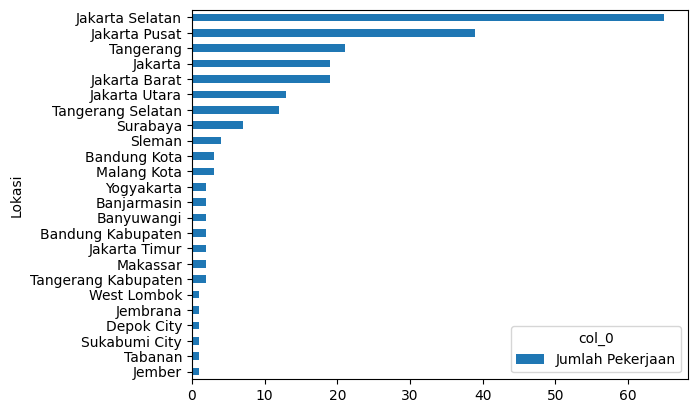

In [100]:
pd.crosstab(
        index=df['Lokasi'],
        columns='Jumlah Pekerjaan'
).sort_values(by='Jumlah Pekerjaan', ascending=True).plot(kind = 'barh')

Insight :
- Kota Jakarta Selatan mempunyai jumlah pekerjaan paling banyak dari kota yang lain.
- 5 kota dengan jumlah pekerjaan paling banyak didominasi oleh kota di provinsi DKI Jakarta.

In [101]:
pd.crosstab(
        index = df['Title Pekerjaan'],
        columns = 'Jumlah Pekerjaan'
    ).sort_values(by = 'Jumlah Pekerjaan', ascending = False).head(5)

col_0,Jumlah Pekerjaan
Title Pekerjaan,
Data Scientist,5
Product Owner,5
Backend Engineer,4
Back End Developer,4
System & Cloud Engineer,3


<AxesSubplot:ylabel='Title Pekerjaan'>

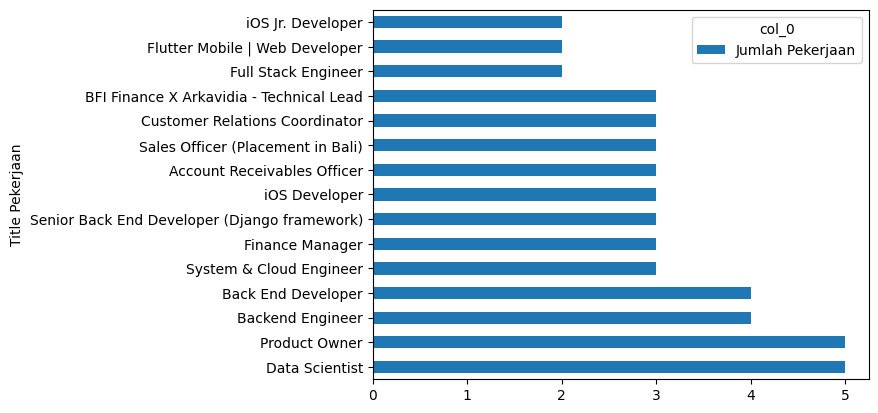

In [102]:
pd.crosstab(
        index = df['Title Pekerjaan'],
        columns = 'Jumlah Pekerjaan'
    ).sort_values(by = 'Jumlah Pekerjaan', ascending = False).head(15).plot(kind = 'barh')

Insight :
- Pekerjaan paling banyak dicari adalah Data Scientist dan Product Owner
- 15 pekerjaan paling banyak didominasi oleh pekerjaan yang berkaitan dengan IT (Web, Database, Programming)

In [103]:
pd.crosstab(
        index = df['Perusahaan'],
        columns = 'Jumlah Pekerjaan'
    ).sort_values(by = 'Jumlah Pekerjaan', ascending = False).head(5)

col_0,Jumlah Pekerjaan
Perusahaan,
PT BFI Finance Indonesia Tbk,20
Kompas Gramedia,10
paper.id,8
"DOKU, PT NUSA SATU INTI ARTHA",8
FinAccel,7


<AxesSubplot:ylabel='Perusahaan'>

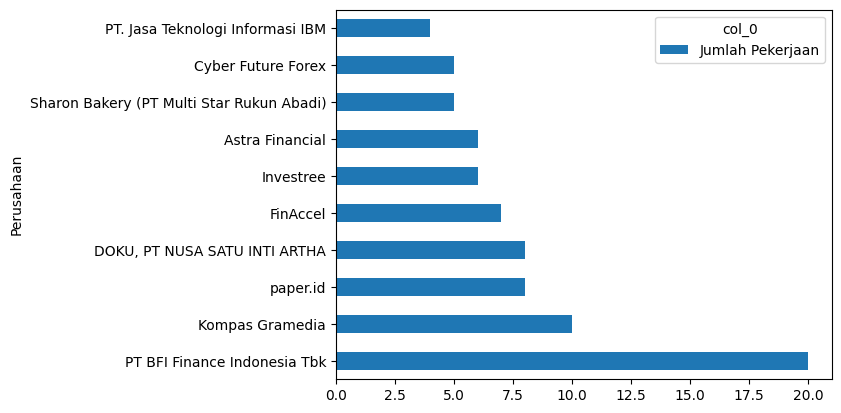

In [104]:
pd.crosstab(
        index = df['Perusahaan'],
        columns = 'Jumlah Pekerjaan'
    ).sort_values(by = 'Jumlah Pekerjaan', ascending = False).head(10).plot(kind = 'barh')

Insight :
- PT BFI Finance Indonesia Tbk menjadi perusahaan dengan jumlah pekerjaan terbanyak
- Antara PT BFI Finance Indonesia Tbk dan perushaan lain mempunyai perbedaan signifikan terkait jumlah lowongan pekerjaan

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [ ]:
from flask import Flask, render_template
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from bs4 import BeautifulSoup 
import requests

#don't change this
matplotlib.use('Agg')
app = Flask(__name__) #do not change this

# #insert the scrapping here
halaman  = 15
title = []
lokasi = []
post_dl = []
perusahaan = []

for i in range(1, halaman + 1):
    print(f'Proses Halaman {i}')
    url_get = requests.get(f"https://www.kalibrr.id/id-ID/job-board/te/data/{i}")
    soup = BeautifulSoup(url_get.content,"html.parser")
    title_0 = soup.find_all('h2', attrs = {'class' : 'k-text-xl k-font-medium'})
    title_1 = BeautifulSoup(str(title_0), 'html.parser')
    for item in title_1.find_all('a', attrs={'class':'k-text-primary-color'}):
        title.append(item.text)
    perusahaan_0 = soup.find_all('span', attrs = {'class' : 'k-inline-flex k-items-center k-mb-1'})
    perusahaan_1 = BeautifulSoup(str(perusahaan_0), 'html.parser')
    for item in perusahaan_1.find_all('a', attrs={'class':'k-text-subdued'}):
        perusahaan.append(item.text)
    for item in soup.find_all('a', attrs={'class':'k-text-subdued k-block'}):
        lokasi.append(item.text)
    for item in soup.find_all('span', attrs={'class':'k-block k-mb-1'}):
        post_dl.append(item.text)
print('DONE')

#change into dataframe
df = pd.DataFrame({"Title Pekerjaan":title,"Lokasi": lokasi, "Post dan Deadline":post_dl, "Perusahaan": perusahaan})

#insert data wrangling here
df = df.replace({'Lokasi': ', Indonesia'}, {'Lokasi' : ''}, regex = True)
df['Lokasi'] = df['Lokasi'].replace(['West Jakarta', 'Kota Jakarta Barat'], 'Jakarta Barat', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['Central Jakarta', 'Central Jakarta City', 'Kota Jakarta Pusat', 'Jakarta Pusat City'],
                                    'Jakarta Pusat', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['North Jakarta'], 'Jakarta Utara', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['East Jakarta'], 'Jakarta Timur', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['South Jakarta', 'South Jakarta City', 'Kota Jakarta Selatan', 'Jakarta Selatan City'],
                                    'Jakarta Selatan', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['South Tangerang'], 'Tangerang Selatan', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['Tangerang Kota'], 'Tangerang', regex = True)

# sekali lagi

df['Lokasi'] = df['Lokasi'].replace(['West Jakarta', 'Kota Jakarta Barat'], 'Jakarta Barat', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['Central Jakarta', 'Central Jakarta City', 'Kota Jakarta Pusat', 'Jakarta Pusat City'],
                                    'Jakarta Pusat', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['North Jakarta'], 'Jakarta Utara', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['East Jakarta'], 'Jakarta Timur', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['South Jakarta', 'South Jakarta City', 'Kota Jakarta Selatan', 'Jakarta Selatan City'],
                                    'Jakarta Selatan', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['South Tangerang'], 'Tangerang Selatan', regex = True)
df['Lokasi'] = df['Lokasi'].replace(['Tangerang Kota'], 'Tangerang', regex = True)

#end of data wranggling 

@app.route("/")
def index():
    card_data = pd.crosstab(
        index=df['Lokasi'],
        columns='Jumlah Pekerjaan'
    ).sort_values(by='Jumlah Pekerjaan', ascending=False).head(5)

    card_data2 = pd.crosstab(
        index = df['Title Pekerjaan'],
        columns = 'Jumlah Pekerjaan'
    ).sort_values(by = 'Jumlah Pekerjaan', ascending = False).head(5)

	# generate plot
    ax = card_data.plot(figsize = (10,6), kind = 'bar', rot = 7)
	# Rendering plot
	# Do not change this
    figfile = BytesIO()
    plt.savefig(figfile, format='png', transparent=True)
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    plot_result = str(figdata_png)[2:-1]

    ax2 = card_data2.plot(figsize = (10,6), kind = 'barh', rot = 7)

    figfile2 = BytesIO()
    plt.savefig(figfile2, format='png', transparent=True)
    figfile2.seek(0)
    figdata_png2 = base64.b64encode(figfile2.getvalue())
    plot_result2 = str(figdata_png2)[2:-1]

	# render to html
    return render_template('index.html',
                           card_data = card_data,
                           plot_result=plot_result,
                           plot_result2=plot_result2,
    )
if __name__ == "__main__": 
    app.run(debug=True)

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.